# K-Means Clustering
---

* Unsupervised Learning Algorithm.
* Groups Unlabeled Dataset into different clusters based on similar properties.
* K here refers to the number of predefined clusters.
* It is a centroid based algorithm, where each cluster is associated with a centroid.

---
## K-Means Algorithm
* Step-1: Select K to decide the number of clusters.
* Step-2: Select random K points or centroids.
* Step-3: Assign each data point to their closest centroid, which will form K 
clusters.
* Step-4: Calculate the variance and place a new centroid of each cluster.
* Step-5: Repeat the initial 3 steps, that is reassign each data point 
to the new closest centroid of each cluster.
* Step-6: If any reassignment occurs, then go to step-4 else FINISH.
* Step-7: The model is ready.

---
## Elbow Method
* To determine the optimal number of clusters (that is K value).
* used Cluster Sum of Squares concept.
* Creates total variations within a cluster.
---

## Importing of Libraries


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


## Load the dataset

In [3]:
path = "../datasets/income.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Plot the data to visualize the clusters

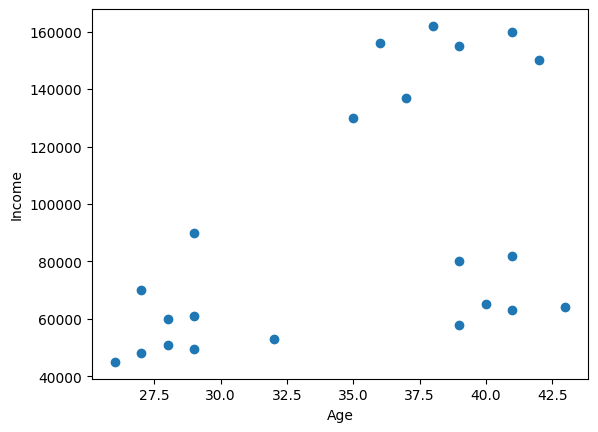

In [5]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

* We can easily make out that 3 clusters can be formed through this plot.
* Hence we use K = 3.

## Cluster Assigning to each records

In [6]:
model = KMeans(n_clusters=3) #Assigning k value

y_pred = model.fit_predict(df[['Age',"Income($)"]])

# Assigning cluster to each record
df['cluster'] = y_pred

df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
# cluster points
print(model.cluster_centers_)

[[3.29090909e+01 5.61363636e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.40000000e+01 8.05000000e+04]]


## Ploting the centroids before Feature Scaling

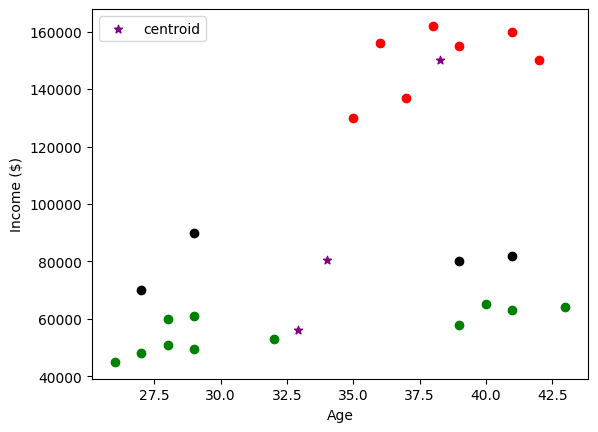

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(
    model.cluster_centers_[:, 0], 
    model.cluster_centers_[:, 1],
    color = 'purple', 
    marker='*', 
    label='centroid'
    )

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

* Income ($40,000 - $160,000) has a much larger range compared to Age (27 - 43).
* Since K-means relies on Euclidean distance, the clustering was heavily influenced by Income, while Age had a minimal effect.
* The clusters are vertically aligned, implying that the algorithm prioritized Income while forming groups.
* This likely occurred due to the absence of feature scaling, which led to an unequal contribution of features in the distance calculations.

## Feature Scaling

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


## Plotting the Centroids after Feature Scaling

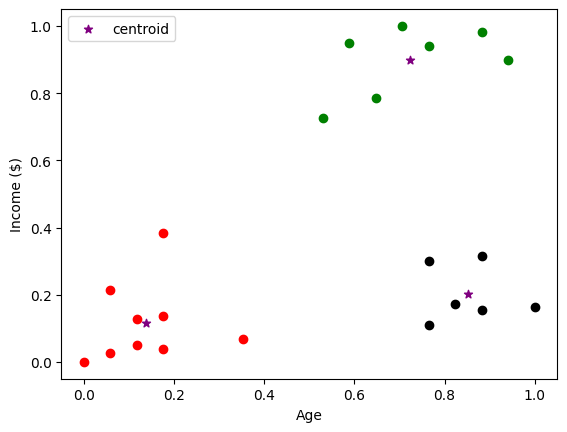

In [11]:
model = KMeans(n_clusters=3) #Assigning k value

y_pred = model.fit_predict(df[['Age',"Income($)"]])

# Assigning cluster to each record
df['cluster'] = y_pred

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(
    model.cluster_centers_[:, 0], 
    model.cluster_centers_[:, 1],
    color = 'purple', 
    marker='*', 
    label='centroid'
    )

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()



* Now we can see that everything falls in place.
* The clusters and cluster centroids are rightly assigned.

## Elbow Method

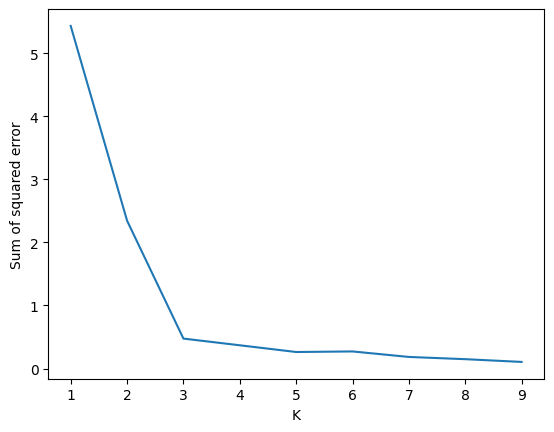

In [12]:
# sse : sum of squared error
sse = []

# range of k
k_rng = range(1,10)

# funding sse for every value of k
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(df[['Age', 'Income($)']])
    sse.append(model.inertia_)

# plotting to get the best value of k by elbow method
plt.xlabel('K') 
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

* Here we can conclude that optimal cluster k value should be 3